## Langkah -langkah
1. Loading Dataset
2. Familiarizing with data & EDA
3. Visualisasi the data
4. Spliting the data
5. Model Building and Training the data
7. Conclusion


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

# 1. Loading The Data

In [2]:
data = pd.read_csv('/content/Phising_dataset.csv',encoding='windows-1254')
data.head()

,URL,Having @ Symbol,Presence of IP Address,Length of URL,No. of Slashes,Special Character,No.of Dots,No. of Hyphen in Host Address,"""Email"" Keyword",TLS,Age of URL,Result
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,1,1,1,-1,-1,-1,1,1,-1,-1,-1
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,1,1,1,-1,-1,-1,1,1,-1,-1,-1
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,1,1,1,-1,1,1,1,1,-1,-1,-1
3,https://resicorphome.com/brian/srr/austin/,1,1,1,-1,1,1,1,1,-1,-1,-1
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,1,1,1,-1,-1,-1,1,1,-1,-1,-1


# 2. Familarizing with data & Exploratory Data Anlysis (EDA)



In [3]:
#determing the shape of the dataset
data.shape

(1400, 12)

In [4]:
#listing the fiture of the dataset
data.columns

Index(['URL', 'Having @ Symbol', 'Presence of IP Address', 'Length of URL',
       'No. of Slashes', 'Special Character', 'No.of Dots',
       'No. of Hyphen in Host Address', '"Email" Keyword', 'TLS ',
       'Age of URL', 'Result'],
      dtype='object')

In [5]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   URL                            1400 non-null   object
 1   Having @ Symbol                1400 non-null   int64 
 2   Presence of IP Address         1400 non-null   int64 
 3   Length of URL                  1400 non-null   int64 
 4   No. of Slashes                 1400 non-null   int64 
 5   Special Character              1400 non-null   int64 
 6   No.of Dots                     1400 non-null   int64 
 7   No. of Hyphen in Host Address  1400 non-null   int64 
 8   "Email" Keyword                1400 non-null   int64 
 9   TLS                            1400 non-null   int64 
 10  Age of URL                     1400 non-null   int64 
 11  Result                         1400 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 131.4+ KB


In [6]:
#unique value in columns
data.nunique()

URL                              679
Having @ Symbol                    1
Presence of IP Address             2
Length of URL                      2
No. of Slashes                     2
Special Character                  2
No.of Dots                         2
No. of Hyphen in Host Address      2
"Email" Keyword                    2
TLS                                2
Age of URL                         2
Result                             2
dtype: int64

In [7]:
# Droping index column
data = data.drop(['URL'], axis = 1)

In [8]:
#description of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Having @ Symbol,1400.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Presence of IP Address,1400.0,0.984286,0.176646,-1.0,1.0,1.0,1.0,1.0
Length of URL,1400.0,0.212857,0.977432,-1.0,-1.0,1.0,1.0,1.0
No. of Slashes,1400.0,0.607143,0.794877,-1.0,1.0,1.0,1.0,1.0
Special Character,1400.0,0.815714,0.578662,-1.0,1.0,1.0,1.0,1.0
No.of Dots,1400.0,0.545714,0.838271,-1.0,1.0,1.0,1.0,1.0
No. of Hyphen in Host Address,1400.0,0.942857,0.333316,-1.0,1.0,1.0,1.0,1.0
"""Email"" Keyword",1400.0,0.982857,0.184435,-1.0,1.0,1.0,1.0,1.0
TLS,1400.0,0.422857,0.906520,-1.0,-1.0,1.0,1.0,1.0
Age of URL,1400.0,-0.188571,0.982410,-1.0,-1.0,-1.0,1.0,1.0


Hasil familiarizing
1. Ada 1400 data dan 12 fitur
2. data 11 diantaranya adalah fitur independen dan 1 adalah dependen
3. setiap fitur bertipe data integer, jadi tidak perlu menggunakan label encoder
4. Tidak ada outlier dalam dataset
5. Tidak missing value pada dataset

# 3. Visualisasi Data
untuk melihat bagimana data di distribusikan dan bagaimaan fitur salig terkait satu sama lain

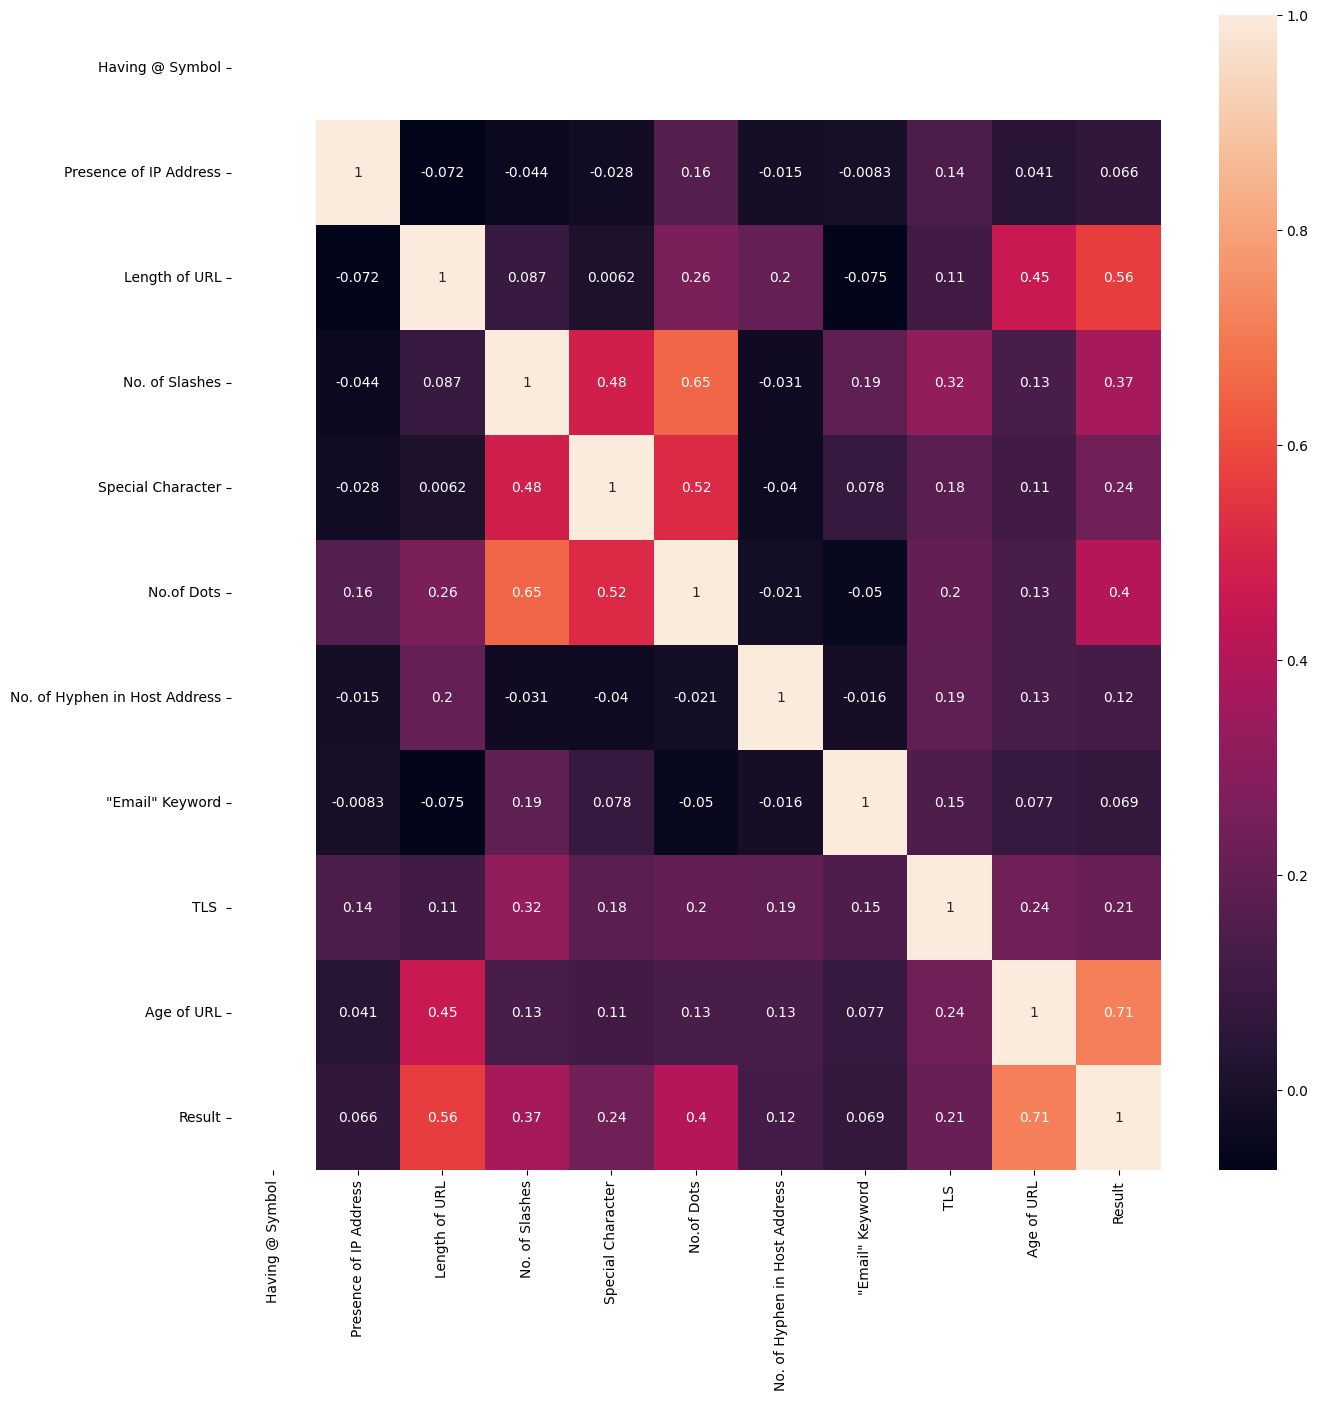

In [9]:
#correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

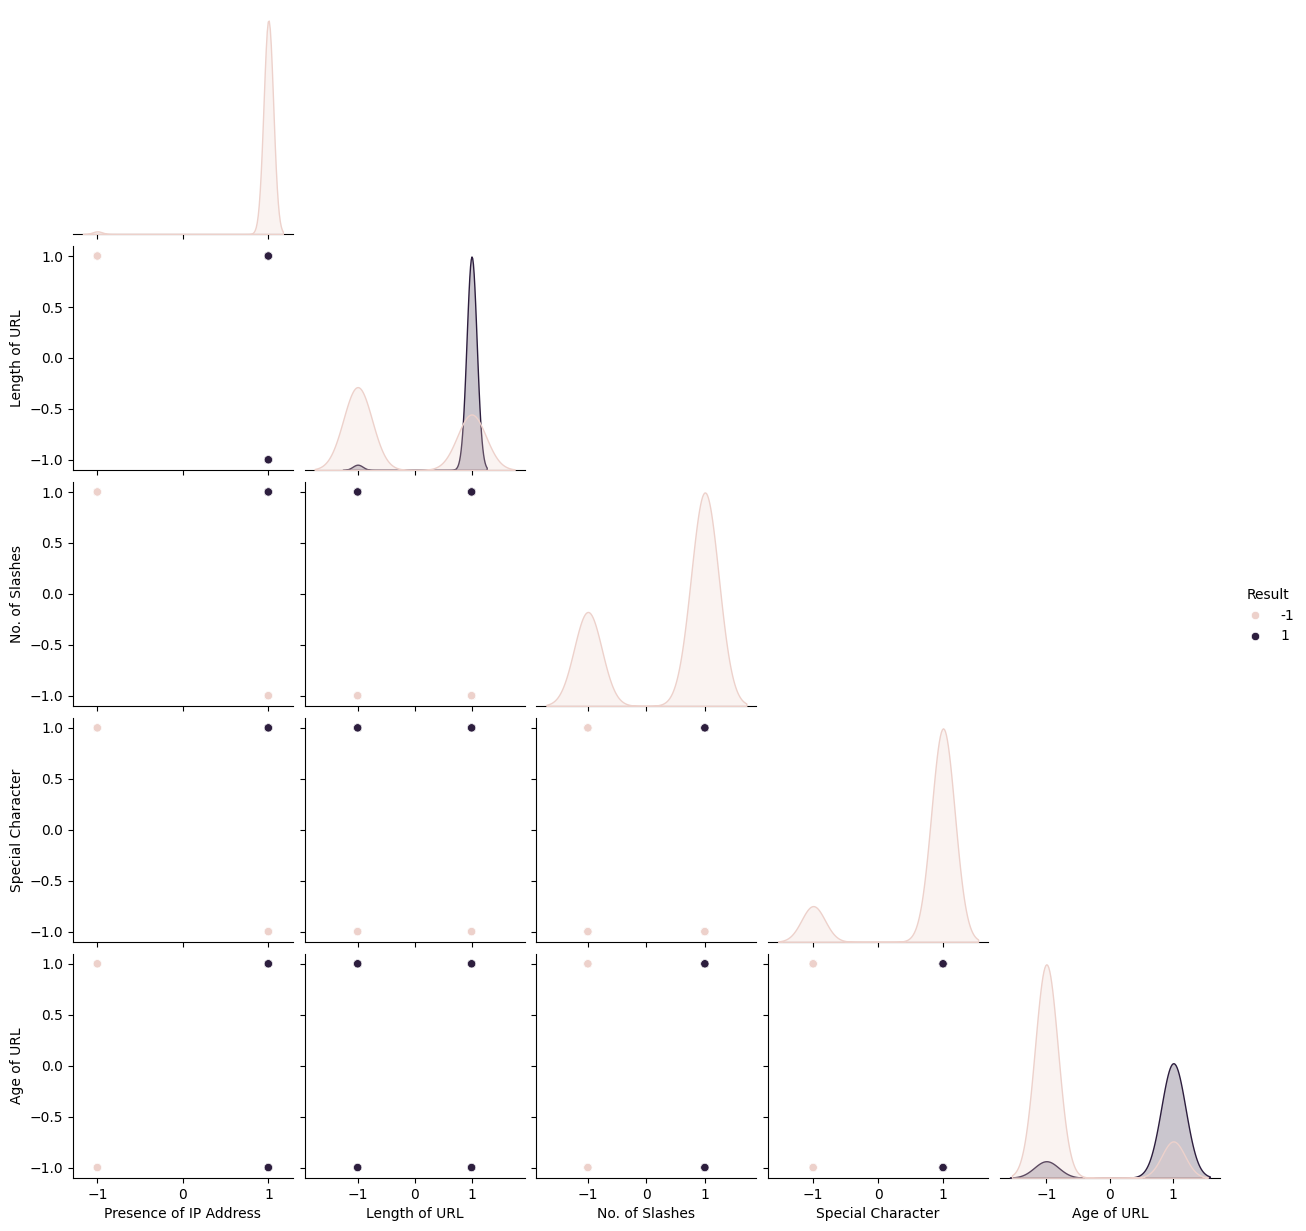

In [10]:
#pairplot untuk fitur tertentu
df = data[['Presence of IP Address', 'Length of URL', 'No. of Slashes', 'Special Character', 'Age of URL', 'Result']]
sns.pairplot(data =df, hue="Result", corner=True)

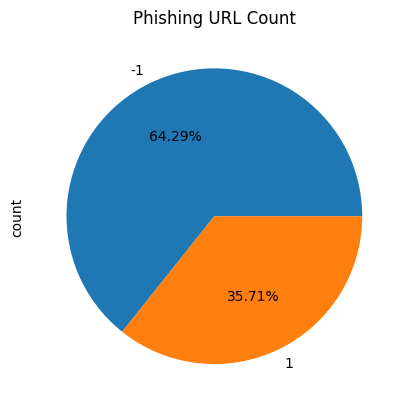

In [11]:
#phishing hitung dalam diagram lingkaran
data['Result'].value_counts().plot(kind='pie', autopct= '%1.2f%%')
plt.title("Phishing URL Count")
plt.show()

Hasil Phishing : angka 1 mendefinisikan bahwa dalam dataset terdapat 35.71% data URL Phishing, sedangkan URL yang aman ada 64.29%

# 4. Splitting Data
Data dibagi jadi data train and test, perbandingan 80:20

In [12]:
#memisalkan dataset menjadi fitur dependen dan independen

X = data.drop(['Result'], axis = 1)
y = data['Result']

In [13]:
#Membagi datset menjadi set train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #,random_state = 80
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1120, 10), (1120,), (280, 10), (280,))

# 5. Model Building and Training the data
Menggunakan Logistic regression

In [14]:
#Membuat holer untuk menyimpan hasil performa model
ML_model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Fungsi yang digunakan untuk memanggil dan menyimpan hasil
def storResult(model, a,b,c,d):
  ML_model.append(model)
  accuracy.append(round(a,3))
  f1_score.append(round(b,3))
  recall.append(round(c,3))
  precision.append(round(d,3))

In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [16]:
'''#Liner Regression Model
from sklearn.linear_model import LogisticRegression
#from sklearn.piepline import pipeline


#intantiate the model
log = LogisticRegression()

#fit the model
log.fit(X_train, y_train)''

SyntaxError: incomplete input (<ipython-input-16-125ca7a13050>, line 1)

In [16]:
#prediksi nilai tergaet dare model untuk sampel

y_train_nb = clf.predict(X_train)
y_test_nb = clf.predict(X_test)

In [17]:
#computing the accuracy, f1_score, precision of the perfomance

acc_train_nb = metrics.accuracy_score(y_train, y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test, y_test_nb)
print("Logistic Regression : Accuracy o training Data: {:.3f}".format(acc_train_nb))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train, y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test, y_test_nb)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_train_nb = metrics.recall_score(y_train, y_train_nb)
recall_test_nb = metrics.recall_score(y_test, y_test_nb)
print("Logistic Regression : recall on training Data: {:.3f}".format(recall_train_nb))
print("Logistic Regression : recall on test Data: {:.3f}".format(recall_test_nb))
print()

precision_train_nb = metrics.accuracy_score(y_train, y_train_nb)
precision_test_nb = metrics.accuracy_score(y_test, y_test_nb)
print("Logistic Regression : precision o training Data: {:.3f}".format(precision_train_nb))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_test_nb))
print()

Logistic Regression : Accuracy o training Data: 0.647
Logistic Regression : Accuracy on test Data: 0.657

Logistic Regression : f1_score on training Data: 0.667
Logistic Regression : f1_score on test Data: 0.682

Logistic Regression : recall on training Data: 1.000
Logistic Regression : recall on test Data: 0.990

Logistic Regression : precision o training Data: 0.647
Logistic Regression : precision on test Data: 0.657



In [18]:
#computing the classification report of the model

print(metrics.classification_report(y_test,y_test_nb))

              precision    recall  f1-score   support

          -1       0.99      0.46      0.63       176
           1       0.52      0.99      0.68       104

    accuracy                           0.66       280
   macro avg       0.75      0.73      0.66       280
weighted avg       0.81      0.66      0.65       280



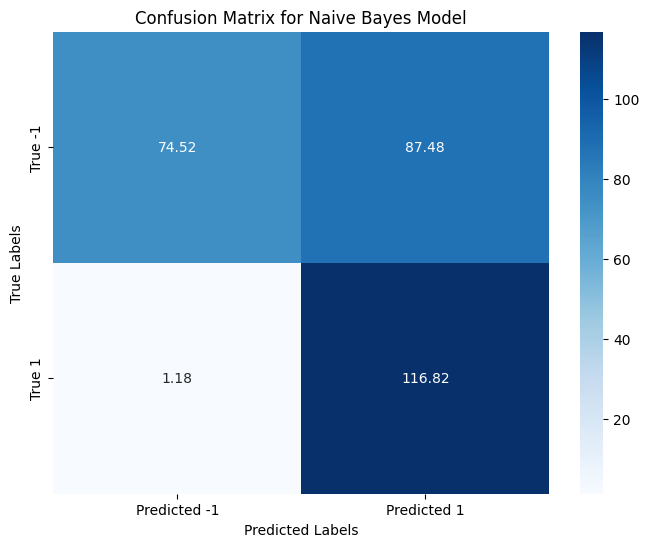

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Given confusion matrix values
cm = np.array([[162*0.46, 162*(1-0.46)],
               [118*(1-0.99), 118*0.99]])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Predicted -1", "Predicted 1"], yticklabels=["True -1", "True 1"])
plt.title("Confusion Matrix for Naive Bayes Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [22]:
!pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [23]:
%%writefile app.py

import streamlit as st

st.write('Hello, *World!* :sunglasses:')

Writing app.py


In [27]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.446s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [25]:
!streamlit run app.py &>/content/logs.txt & !npx localtunnel --port 8501 & curl ipv4.icanhazip.com

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.801s
your url is: https://rude-bats-repeat.loca.lt
